In [1]:
# Import needed libraries
import sqlite3
import pandas
from matplotlib import pyplot
import numpy as np

In [2]:
# Load the data from the database
con = sqlite3.connect("evaluation.db")
df = pandas.read_sql_query("SELECT * from experiment_germ_polit", con)

In [3]:
# Print the data
df

,time,size,with_wrapper,in_container,with_compression,number_of_annotators,scaleout,confirm_integrity
0,4886,1089621,1,0,deflate,4,1,0
1,114,303785,1,0,deflate,4,1,0
2,196,537626,1,0,deflate,4,1,0
3,307,1063769,1,0,deflate,4,1,0
4,212,930703,1,0,deflate,4,1,0
...,...,...,...,...,...,...,...,...
160435,1,146458,0,0,none,1,1,0
160436,1,219773,0,0,none,1,1,0
160437,1,154805,0,0,none,1,1,0
160438,1,122006,0,0,none,1,1,0


In [4]:
# Load the data of the swarm evaluation
df_async = pandas.read_sql_query("SELECT * from experiment_germ_polit_async", con)
df_async

,time,documents,number_of_annotators
0,387544,6685,4
1,182156,6685,3
2,168848,6685,2
3,53548,6685,1


In [5]:
# Get the rows for the different setups
no_cont_0 = df[(df["with_wrapper"] == 0) & (df["in_container"] == 0) & (df["confirm_integrity"] == 0) & (df["number_of_annotators"] == 1)]
no_cont_1 = df[(df["with_wrapper"] == 0) & (df["in_container"] == 0) & (df["confirm_integrity"] == 0) & (df["number_of_annotators"] == 2)]
no_cont_2 = df[(df["with_wrapper"] == 0) & (df["in_container"] == 0) & (df["confirm_integrity"] == 0) & (df["number_of_annotators"] == 3)]
no_cont_3 = df[(df["with_wrapper"] == 0) & (df["in_container"] == 0) & (df["confirm_integrity"] == 0) & (df["number_of_annotators"] == 4)]

cnt_0 = df[(df["with_compression"] == "xz")&(df["with_wrapper"] == 1) & (df["in_container"] == 1) & (df["confirm_integrity"] == 0) & (df["number_of_annotators"] == 1)]
cnt_1 = df[(df["with_compression"] == "xz")&(df["with_wrapper"] == 1) & (df["in_container"] == 1) & (df["confirm_integrity"] == 0) & (df["number_of_annotators"] == 2)]
cnt_2 = df[(df["with_compression"] == "xz")&(df["with_wrapper"] == 1) & (df["in_container"] == 1) & (df["confirm_integrity"] == 0) & (df["number_of_annotators"] == 3)]
cnt_3 = df[(df["with_compression"] == "xz")&(df["with_wrapper"] == 1) & (df["in_container"] == 1) & (df["confirm_integrity"] == 0) & (df["number_of_annotators"] == 4)]


no_cont_0_25 = no_cont_0[no_cont_0["size"] < no_cont_0["size"].quantile(0.25)]["time"].mean()
no_cont_1_25 = no_cont_1[no_cont_1["size"] < no_cont_1["size"].quantile(0.25)]["time"].mean()
no_cont_2_25 = no_cont_2[no_cont_2["size"] < no_cont_2["size"].quantile(0.25)]["time"].mean()
no_cont_3_25 = no_cont_3[no_cont_3["size"] < no_cont_3["size"].quantile(0.25)]["time"].mean()

cnt_0_25 = cnt_0[cnt_0["size"] < cnt_0["size"].quantile(0.25)]["time"].mean()
cnt_1_25 = cnt_1[cnt_1["size"] < cnt_1["size"].quantile(0.25)]["time"].mean()
cnt_2_25 = cnt_2[cnt_2["size"] < cnt_2["size"].quantile(0.25)]["time"].mean()
cnt_3_25 = cnt_3[cnt_3["size"] < cnt_3["size"].quantile(0.25)]["time"].mean()

no_cont_0_75 = no_cont_0[no_cont_0["size"] > no_cont_0["size"].quantile(0.75)]["time"].mean()
no_cont_1_75 = no_cont_1[no_cont_1["size"] > no_cont_1["size"].quantile(0.75)]["time"].mean()
no_cont_2_75 = no_cont_2[no_cont_2["size"] > no_cont_2["size"].quantile(0.75)]["time"].mean()
no_cont_3_75 = no_cont_3[no_cont_3["size"] > no_cont_3["size"].quantile(0.75)]["time"].mean()

cnt_0_75 = cnt_0[cnt_0["size"] > cnt_0["size"].quantile(0.75)]["time"].mean()
cnt_1_75 = cnt_1[cnt_1["size"] > cnt_1["size"].quantile(0.75)]["time"].mean()
cnt_2_75 = cnt_2[cnt_2["size"] > cnt_2["size"].quantile(0.75)]["time"].mean()
cnt_3_75 = cnt_3[cnt_3["size"] > cnt_3["size"].quantile(0.75)]["time"].mean()

   mean container
0       11.266308
1       24.700778
2       25.013764
3       59.959306
   mean container
0       11.266308
1       24.700778
2       25.013764
3       59.959306
Rectangle(xy=(-0.25, 0), width=0.25, height=0.781568, angle=0)
Rectangle(xy=(0.75, 0), width=0.25, height=8.62956, angle=0)
Rectangle(xy=(1.75, 0), width=0.25, height=8.48354, angle=0)
Rectangle(xy=(2.75, 0), width=0.25, height=38.6942, angle=0)
Rectangle(xy=(0, 0), width=0.25, height=11.2663, angle=0)
Rectangle(xy=(1, 0), width=0.25, height=24.7008, angle=0)
Rectangle(xy=(2, 0), width=0.25, height=25.0138, angle=0)
Rectangle(xy=(3, 0), width=0.25, height=59.9593, angle=0)


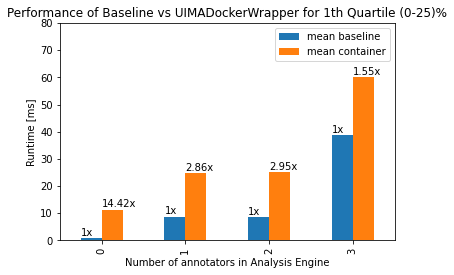

In [6]:
cnt = pandas.DataFrame({"mean container": [cnt_0_25,cnt_1_25,cnt_2_25,cnt_3_25]})
print(cnt)
third = pandas.DataFrame({"mean baseline": [no_cont_0_25,no_cont_1_25,no_cont_2_25,no_cont_3_25]})


cnt = cnt.rename(columns={'mean': 'mean container'})
third = third.rename(columns={'mean': 'mean baseline'})
print(cnt)
new = pandas.concat([third,cnt],axis=1)
result = new.plot.bar(ylim=(0,80))
result.set_title("Performance of Baseline vs UIMADockerWrapper for 1th Quartile (0-25)%")
result.set_ylabel("Runtime [ms]")
result.set_xlabel("Number of annotators in Analysis Engine")
counter = 1
for p in result.patches:
    print(p)
    if counter < 5:
        result.annotate(str(1)+'x', (p.get_x(), p.get_height() +1))
    else:
        result.annotate("{:.2f}".format(cnt["mean container"][counter-5]/third["mean baseline"][counter-5])+'x', (p.get_x(), p.get_height() +1))
    counter+=1
result.get_figure().savefig("performance_german_1th.png",dpi=600)

Rectangle(xy=(-0.25, 0), width=0.25, height=2.45542, angle=0)
Rectangle(xy=(0.75, 0), width=0.25, height=28.6565, angle=0)
Rectangle(xy=(1.75, 0), width=0.25, height=28.3351, angle=0)
Rectangle(xy=(2.75, 0), width=0.25, height=168.636, angle=0)
Rectangle(xy=(0, 0), width=0.25, height=35.3064, angle=0)
Rectangle(xy=(1, 0), width=0.25, height=75.9587, angle=0)
Rectangle(xy=(2, 0), width=0.25, height=76.9437, angle=0)
Rectangle(xy=(3, 0), width=0.25, height=260.804, angle=0)


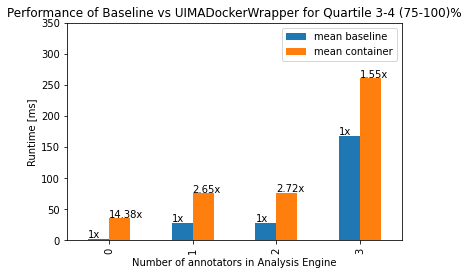

In [7]:
cnt2 = pandas.DataFrame({"mean container": [cnt_0_75,cnt_1_75,cnt_2_75,cnt_3_75]})
third2 = pandas.DataFrame({"mean baseline": [no_cont_0_75,no_cont_1_75,no_cont_2_75,no_cont_3_75]})
new2 = pandas.concat([third2,cnt2],axis=1)
result = new2.plot.bar(ylim=(0,350))
result.set_ylabel("Runtime [ms]")
result.set_title("Performance of Baseline vs UIMADockerWrapper for Quartile 3-4 (75-100)%")
result.set_xlabel("Number of annotators in Analysis Engine")
counter = 1
for p in result.patches:
    print(p)
    if counter < 5:
        result.annotate(str(1)+'x', (p.get_x(), p.get_height() +1))
    else:
        result.annotate("{:.2f}".format(cnt2["mean container"][counter-5]/third2["mean baseline"][counter-5])+'x', (p.get_x(), p.get_height() +1))
    counter+=1
result.get_figure().savefig("performance_german_4th.png",dpi=600)

     time  documents  number_of_annotators
0  387544       6685                     4
1  182156       6685                     3
2  168848       6685                     2
3   53548       6685                     1
number_of_annotators
1     8.010172
2    25.257741
3    27.248467
4    57.972177
Name: time, dtype: float64


1.5083749190631601

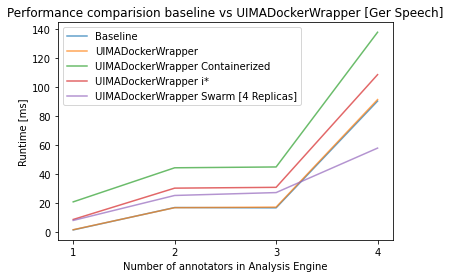

In [8]:
ax1 = pyplot.subplot()
pyplot.xticks(np.arange(1, 5, 1))
third = df[(df["with_wrapper"] == 0) & (df["in_container"] == 0) & (df["confirm_integrity"] == 0)].groupby("number_of_annotators")["time"].agg(["mean","std"])
wrp = df[(df["with_compression"] == "xz")&(df["with_wrapper"] == 1) & (df["in_container"] == 0) & (df["confirm_integrity"] == 0)].groupby("number_of_annotators")["time"].agg(["mean","std"])
wrp_i = df[(df["with_compression"] == "xz")&(df["with_wrapper"] == 1) & (df["in_container"] == 0) & (df["confirm_integrity"] == 1)].groupby("number_of_annotators")["time"].agg(["mean","std"])
cnt = df[(df["with_compression"] == "xz")&(df["with_wrapper"] == 1) & (df["in_container"] == 1) & (df["confirm_integrity"] == 0)].groupby("number_of_annotators")["time"].agg(["mean","std"])

print(df_async)
async_strat = df_async
async_strat = async_strat.groupby("number_of_annotators").agg("mean")
async_strat = async_strat["time"]/6685
print(async_strat)
wrp_second = pandas.DataFrame([cnt_0.mean(),cnt_1.mean(),cnt_2.mean(),cnt_3.mean()])
ax1.plot(third.index, third["mean"], label="Baseline", alpha=0.7)
ax1.plot(wrp.index, wrp["mean"],label="UIMADockerWrapper", alpha=0.7)
ax1.plot(cnt.index, cnt["mean"],label="UIMADockerWrapper Containerized", alpha=0.7)
ax1.plot(wrp_i.index, wrp_i["mean"],label="UIMADockerWrapper i*", alpha=0.7)
ax1.plot(async_strat.index, async_strat,label="UIMADockerWrapper Swarm [4 Replicas]", alpha=0.7)

ax1.set_xlabel("Number of annotators in Analysis Engine")
ax1.set_ylabel("Runtime [ms]")
ax1.set_title("Performance comparision baseline vs UIMADockerWrapper")
ax1.legend()
ax1.get_figure().savefig("performance_ger_polit.png",dpi=600)
cnt["mean"][4]/wrp["mean"][4]

In [9]:
third.columns = ["mean_baseline", "std_baseline"]
wrp.columns = ["mean_dockerwrapper","std_dockerwrapper"]
cnt.columns = ["mean_dckwrpcont","std_dckwrpcont"]
pandas.concat([third,wrp,cnt,wrp_i], axis=1).rename_axis(columns=["other"],axis=1)

other,mean_baseline,std_baseline,mean_dockerwrapper,std_dockerwrapper,mean_dckwrpcont,std_dckwrpcont,mean,std
number_of_annotators,,,,,,,,
1,1.460135,0.874075,1.592521,0.962494,20.830965,128.374030,8.678684,5.283945
2,16.906956,9.110451,16.822737,8.997265,44.370830,134.647256,30.315782,16.426014
3,16.705610,8.843870,17.198504,9.043379,44.943156,134.300883,30.872550,16.739956
4,90.444577,67.581308,91.486612,68.440804,137.996111,243.086785,108.707554,77.803093


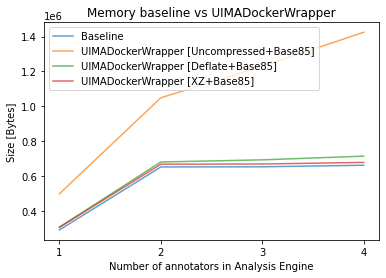

In [23]:
new_df = pandas.DataFrame()
ax1 = pyplot.subplot()
pyplot.xticks(np.arange(1, 5, 1))
third = df[(df["with_wrapper"] == 0) & (df["in_container"] == 0)].groupby("number_of_annotators")["size"].agg(["mean","std"])
wrp_no_comp = df[(df["with_wrapper"] == 1) & (df["in_container"] == 0) & (df["with_compression"] == "")].groupby("number_of_annotators")["size"].agg(["mean","std"])
wrp_def = df[(df["with_wrapper"] == 1) & (df["in_container"] == 0) & (df["with_compression"] == "deflate")].groupby("number_of_annotators")["size"].agg(["mean","std"])
wrp_xz = df[(df["with_wrapper"] == 1) & (df["in_container"] == 0) & (df["with_compression"] == "xz")].groupby("number_of_annotators")["size"].agg(["mean","std"])

cnt = df[(df["with_wrapper"] == 1) & (df["in_container"] == 1)].groupby("number_of_annotators")["size"].agg(["mean","std"])
ax1.plot(third.index, third["mean"], label="Baseline", alpha=0.7)
ax1.plot(wrp_no_comp.index, wrp_no_comp["mean"],label="UIMADockerWrapper [Uncompressed+Base85]", alpha=0.7)
ax1.plot(wrp_def.index, wrp_def["mean"],label="UIMADockerWrapper [Deflate+Base85]", alpha=0.7)
ax1.plot(wrp_xz.index, wrp_xz["mean"],label="UIMADockerWrapper [XZ+Base85]", alpha=0.7)
ax1.set_xlabel("Number of annotators in Analysis Engine")
ax1.set_ylabel("Size [Bytes]")
ax1.set_title("Memory baseline vs UIMADockerWrapper")
ax1.legend()
ax1.get_figure().savefig("size_ger_polit.png",dpi=600)

In [11]:
third.columns = ["mean_baseline", "std_baseline"]
wrp_no_comp.columns = ["mean_uncompressed","std_uncompressed"]
wrp_def.columns = ["mean_deflate","std_deflate"]
wrp_xz.columns = ["mean_xz","std_xz"]
pandas.concat([third,wrp_no_comp,wrp_def,wrp_xz], axis=1)

,mean_baseline,std_baseline,mean_uncompressed,std_uncompressed,mean_deflate,std_deflate,mean_xz,std_xz
number_of_annotators,,,,,,,,
1,293340.819746,200392.150590,5.000707e+05,200392.308311,309345.692296,200392.308311,307882.094839,200384.978865
2,653711.083770,442623.783771,1.049527e+06,442623.922240,682148.065969,442623.922240,669388.658115,442607.472938
3,654533.219297,443045.946407,1.229950e+06,443046.085175,694276.202693,443046.085175,670520.786687,443029.620056
4,663410.085714,447034.272568,1.424508e+06,447034.413143,715522.071354,447034.413143,679732.665146,447017.795156


# Load the evaluation for english wikipedia

In [12]:
df_wiki = pandas.read_sql_query("SELECT * from experiment_en_wikipedia", con)
df_wiki_async = pandas.read_sql_query("SELECT * from experiment_en_wikipedia_async", con)

In [13]:
# Get the rows for the different setups
no_cont_0 = df_wiki[(df_wiki["with_wrapper"] == 0) & (df_wiki["in_container"] == 0) & (df_wiki["confirm_integrity"] == 0) & (df_wiki["number_of_annotators"] == 1)]
no_cont_1 = df_wiki[(df_wiki["with_wrapper"] == 0) & (df_wiki["in_container"] == 0) & (df_wiki["confirm_integrity"] == 0) & (df_wiki["number_of_annotators"] == 2)]
no_cont_2 = df_wiki[(df_wiki["with_wrapper"] == 0) & (df_wiki["in_container"] == 0) & (df_wiki["confirm_integrity"] == 0) & (df_wiki["number_of_annotators"] == 3)]
no_cont_3 = df_wiki[(df_wiki["with_wrapper"] == 0) & (df_wiki["in_container"] == 0) & (df_wiki["confirm_integrity"] == 0) & (df_wiki["number_of_annotators"] == 4)]

cnt_0 = df_wiki[(df_wiki["with_compression"] == "xz")&(df_wiki["with_wrapper"] == 1) & (df_wiki["in_container"] == 1) & (df_wiki["confirm_integrity"] == 0) & (df_wiki["number_of_annotators"] == 1)]
cnt_1 = df_wiki[(df_wiki["with_compression"] == "xz")&(df_wiki["with_wrapper"] == 1) & (df_wiki["in_container"] == 1) & (df_wiki["confirm_integrity"] == 0) & (df_wiki["number_of_annotators"] == 2)]
cnt_2 = df_wiki[(df_wiki["with_compression"] == "xz")&(df_wiki["with_wrapper"] == 1) & (df_wiki["in_container"] == 1) & (df_wiki["confirm_integrity"] == 0) & (df_wiki["number_of_annotators"] == 3)]
cnt_3 = df_wiki[(df_wiki["with_compression"] == "xz")&(df_wiki["with_wrapper"] == 1) & (df_wiki["in_container"] == 1) & (df_wiki["confirm_integrity"] == 0) & (df_wiki["number_of_annotators"] == 4)]


no_cont_0_25 = no_cont_0[no_cont_0["size"] < no_cont_0["size"].quantile(0.25)]["time"].mean()
no_cont_1_25 = no_cont_1[no_cont_1["size"] < no_cont_1["size"].quantile(0.25)]["time"].mean()
no_cont_2_25 = no_cont_2[no_cont_2["size"] < no_cont_2["size"].quantile(0.25)]["time"].mean()
no_cont_3_25 = no_cont_3[no_cont_3["size"] < no_cont_3["size"].quantile(0.25)]["time"].mean()

cnt_0_25 = cnt_0[cnt_0["size"] < cnt_0["size"].quantile(0.25)]["time"].mean()
cnt_1_25 = cnt_1[cnt_1["size"] < cnt_1["size"].quantile(0.25)]["time"].mean()
cnt_2_25 = cnt_2[cnt_2["size"] < cnt_2["size"].quantile(0.25)]["time"].mean()
cnt_3_25 = cnt_3[cnt_3["size"] < cnt_3["size"].quantile(0.25)]["time"].mean()

no_cont_0_75 = no_cont_0[no_cont_0["size"] > no_cont_0["size"].quantile(0.75)]["time"].mean()
no_cont_1_75 = no_cont_1[no_cont_1["size"] > no_cont_1["size"].quantile(0.75)]["time"].mean()
no_cont_2_75 = no_cont_2[no_cont_2["size"] > no_cont_2["size"].quantile(0.75)]["time"].mean()
no_cont_3_75 = no_cont_3[no_cont_3["size"] > no_cont_3["size"].quantile(0.75)]["time"].mean()

cnt_0_75 = cnt_0[cnt_0["size"] > cnt_0["size"].quantile(0.75)]["time"].mean()
cnt_1_75 = cnt_1[cnt_1["size"] > cnt_1["size"].quantile(0.75)]["time"].mean()
cnt_2_75 = cnt_2[cnt_2["size"] > cnt_2["size"].quantile(0.75)]["time"].mean()
cnt_3_75 = cnt_3[cnt_3["size"] > cnt_3["size"].quantile(0.75)]["time"].mean()

   mean container
0       22.003203
1      142.104884
2      134.706165
3      137.724359
   mean container
0       22.003203
1      142.104884
2      134.706165
3      137.724359
Rectangle(xy=(-0.25, 0), width=0.25, height=0.460368, angle=0)
Rectangle(xy=(0.75, 0), width=0.25, height=112.142, angle=0)
Rectangle(xy=(1.75, 0), width=0.25, height=112.17, angle=0)
Rectangle(xy=(2.75, 0), width=0.25, height=115.425, angle=0)
Rectangle(xy=(0, 0), width=0.25, height=22.0032, angle=0)
Rectangle(xy=(1, 0), width=0.25, height=142.105, angle=0)
Rectangle(xy=(2, 0), width=0.25, height=134.706, angle=0)
Rectangle(xy=(3, 0), width=0.25, height=137.724, angle=0)


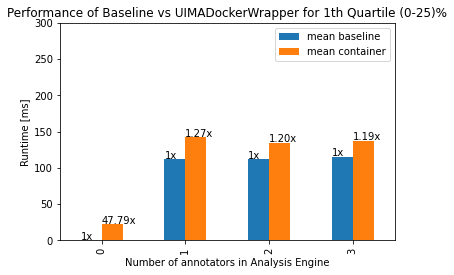

In [15]:
cnt = pandas.DataFrame({"mean container": [cnt_0_25,cnt_1_25,cnt_2_25,cnt_3_25]})
print(cnt)
third = pandas.DataFrame({"mean baseline": [no_cont_0_25,no_cont_1_25,no_cont_2_25,no_cont_3_25]})


cnt = cnt.rename(columns={'mean': 'mean container'})
third = third.rename(columns={'mean': 'mean baseline'})
print(cnt)
new = pandas.concat([third,cnt],axis=1)
result = new.plot.bar(ylim=(0,300))
result.set_title("Performance of Baseline vs UIMADockerWrapper for 1th Quartile (0-25)%")
result.set_ylabel("Runtime [ms]")
result.set_xlabel("Number of annotators in Analysis Engine")
counter = 1
for p in result.patches:
    print(p)
    if counter < 5:
        result.annotate(str(1)+'x', (p.get_x(), p.get_height() +1))
    else:
        result.annotate("{:.2f}".format(cnt["mean container"][counter-5]/third["mean baseline"][counter-5])+'x', (p.get_x(), p.get_height() +1))
    counter+=1
result.get_figure().savefig("performance_wiki_1th.png",dpi=600)

Rectangle(xy=(-0.25, 0), width=0.25, height=1.11849, angle=0)
Rectangle(xy=(0.75, 0), width=0.25, height=365.204, angle=0)
Rectangle(xy=(1.75, 0), width=0.25, height=362.821, angle=0)
Rectangle(xy=(2.75, 0), width=0.25, height=408.163, angle=0)
Rectangle(xy=(0, 0), width=0.25, height=13.8631, angle=0)
Rectangle(xy=(1, 0), width=0.25, height=418.789, angle=0)
Rectangle(xy=(2, 0), width=0.25, height=393.643, angle=0)
Rectangle(xy=(3, 0), width=0.25, height=448.633, angle=0)


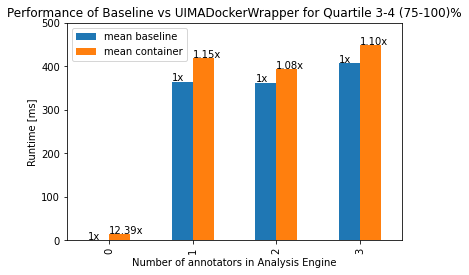

In [18]:
cnt2 = pandas.DataFrame({"mean container": [cnt_0_75,cnt_1_75,cnt_2_75,cnt_3_75]})
third2 = pandas.DataFrame({"mean baseline": [no_cont_0_75,no_cont_1_75,no_cont_2_75,no_cont_3_75]})
new2 = pandas.concat([third2,cnt2],axis=1)
result = new2.plot.bar(ylim=(0,500))
result.set_ylabel("Runtime [ms]")
result.set_title("Performance of Baseline vs UIMADockerWrapper for Quartile 3-4 (75-100)%")
result.set_xlabel("Number of annotators in Analysis Engine")
counter = 1
for p in result.patches:
    print(p)
    if counter < 5:
        result.annotate(str(1)+'x', (p.get_x(), p.get_height() +1))
    else:
        result.annotate("{:.2f}".format(cnt2["mean container"][counter-5]/third2["mean baseline"][counter-5])+'x', (p.get_x(), p.get_height() +1))
    counter+=1
result.get_figure().savefig("performance_wiki_4th.png",dpi=600)

     time  documents  number_of_annotators
0  387544       6685                     4
1  182156       6685                     3
2  168848       6685                     2
3   53548       6685                     1
number_of_annotators
1      5.986792
2    132.443666
3    132.685211
4    147.506104
Name: time, dtype: float64


1.1288490464983902

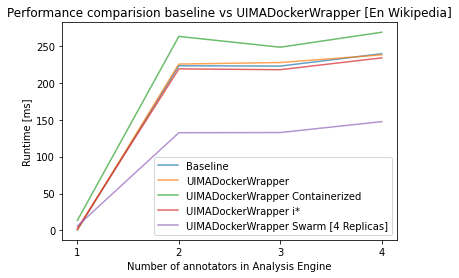

In [22]:
ax1 = pyplot.subplot()
pyplot.xticks(np.arange(1, 5, 1))
third = df_wiki[(df_wiki["with_wrapper"] == 0) & (df_wiki["in_container"] == 0) & (df_wiki["confirm_integrity"] == 0)].groupby("number_of_annotators")["time"].agg(["mean","std"])
wrp = df_wiki[(df_wiki["with_compression"] == "xz")&(df_wiki["with_wrapper"] == 1) & (df_wiki["in_container"] == 0) & (df_wiki["confirm_integrity"] == 0)].groupby("number_of_annotators")["time"].agg(["mean","std"])
wrp_i = df_wiki[(df_wiki["with_compression"] == "xz")&(df_wiki["with_wrapper"] == 1) & (df_wiki["in_container"] == 0) & (df_wiki["confirm_integrity"] == 1)].groupby("number_of_annotators")["time"].agg(["mean","std"])
cnt = df_wiki[(df_wiki["with_compression"] == "xz")&(df_wiki["with_wrapper"] == 1) & (df_wiki["in_container"] == 1) & (df_wiki["confirm_integrity"] == 0)].groupby("number_of_annotators")["time"].agg(["mean","std"])

print(df_async)
async_strat = df_wiki_async
async_strat = async_strat.groupby("number_of_annotators").agg("mean")
async_strat = async_strat["time"]/4997
print(async_strat)
wrp_second = pandas.DataFrame([cnt_0.mean(),cnt_1.mean(),cnt_2.mean(),cnt_3.mean()])
ax1.plot(third.index, third["mean"], label="Baseline", alpha=0.7)
ax1.plot(wrp.index, wrp["mean"],label="UIMADockerWrapper", alpha=0.7)
ax1.plot(cnt.index, cnt["mean"],label="UIMADockerWrapper Containerized", alpha=0.7)
ax1.plot(wrp_i.index, wrp_i["mean"],label="UIMADockerWrapper i*", alpha=0.7)
ax1.plot(async_strat.index, async_strat,label="UIMADockerWrapper Swarm [4 Replicas]", alpha=0.7)

ax1.set_xlabel("Number of annotators in Analysis Engine")
ax1.set_ylabel("Runtime [ms]")
ax1.set_title("Performance comparision baseline vs UIMADockerWrapper")
ax1.legend()
ax1.get_figure().savefig("performance_wiki.png",dpi=600)
cnt["mean"][4]/wrp["mean"][4]

In [20]:
third.columns = ["mean_baseline", "std_baseline"]
wrp.columns = ["mean_dockerwrapper","std_dockerwrapper"]
cnt.columns = ["mean_dckwrpcont","std_dckwrpcont"]
pandas.concat([third,wrp,cnt,wrp_i], axis=1).rename_axis(columns=["other"],axis=1)

other,mean_baseline,std_baseline,mean_dockerwrapper,std_dockerwrapper,mean_dckwrpcont,std_dckwrpcont,mean,std
number_of_annotators,,,,,,,,
1,0.668001,0.659083,0.747048,0.687628,13.559736,148.096654,2.405844,2.773219
2,223.224335,679.597171,225.524715,683.891567,263.034421,797.411274,218.992395,657.025359
3,222.771263,678.081637,227.637983,695.183289,248.384631,745.015214,217.912147,653.593983
4,239.563138,686.110647,238.013408,682.266821,268.681209,771.526258,233.967180,674.392412


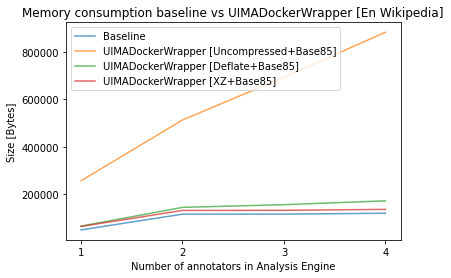

In [21]:
new_df = pandas.DataFrame()
ax1 = pyplot.subplot()
pyplot.xticks(np.arange(1, 5, 1))
third = df_wiki[(df_wiki["with_wrapper"] == 0) & (df_wiki["in_container"] == 0)].groupby("number_of_annotators")["size"].agg(["mean","std"])
wrp_no_comp = df_wiki[(df_wiki["with_wrapper"] == 1) & (df_wiki["in_container"] == 0) & (df_wiki["with_compression"] == "")].groupby("number_of_annotators")["size"].agg(["mean","std"])
wrp_def = df_wiki[(df_wiki["with_wrapper"] == 1) & (df_wiki["in_container"] == 0) & (df_wiki["with_compression"] == "deflate")].groupby("number_of_annotators")["size"].agg(["mean","std"])
wrp_xz = df_wiki[(df_wiki["with_wrapper"] == 1) & (df_wiki["in_container"] == 0) & (df_wiki["with_compression"] == "xz")].groupby("number_of_annotators")["size"].agg(["mean","std"])

cnt = df_wiki[(df_wiki["with_wrapper"] == 1) & (df_wiki["in_container"] == 1)].groupby("number_of_annotators")["size"].agg(["mean","std"])
ax1.plot(third.index, third["mean"], label="Baseline", alpha=0.7)
ax1.plot(wrp_no_comp.index, wrp_no_comp["mean"],label="UIMADockerWrapper [Uncompressed+Base85]", alpha=0.7)
ax1.plot(wrp_def.index, wrp_def["mean"],label="UIMADockerWrapper [Deflate+Base85]", alpha=0.7)
ax1.plot(wrp_xz.index, wrp_xz["mean"],label="UIMADockerWrapper [XZ+Base85]", alpha=0.7)
ax1.set_xlabel("Number of annotators in Analysis Engine")
ax1.set_ylabel("Size [Bytes]")
ax1.set_title("Memory consumption baseline vs UIMADockerWrapper")
ax1.legend()
ax1.get_figure().savefig("size_wiki.png",dpi=600)

In [12]:
import os
sizes = []
for root,directories,file in os.walk('/home/alexander/Documents/BachelorThesis/corpora/extract_wikipedia_sample/output'):
    for fil in file:
        if fil.endswith('.txt'):
            path = os.path.join(root, fil)
            sizes.append(os.stat(path).st_size)
dataf = pandas.DataFrame(sizes)
dataf.describe()

,0
count,4997.000000
mean,1779.323594
std,3353.328445
min,8.000000
25%,230.000000
50%,689.000000
75%,1905.000000
max,53501.000000
